In [306]:
# import necessrary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

In [287]:
# upload data
df_eng = pd.read_csv('takehome_user_engagement.csv')
df_eng.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [288]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [289]:
# find the number of unique users and their total rows.
print('There are {} unique users and {} rows '.format(df_eng['user_id'].nunique(), len(df_eng)))

There are 8823 unique users and 207917 rows 


In [290]:
#changing time_stamp to datetime object
df_eng['time_stamp']=pd.to_datetime(df_eng['time_stamp'],infer_datetime_format=True)

In [291]:
# define a function to find adopted user who has logged into the product on three separate days in at least one sevenday period.
def find_logins(df, days=7, logins=3):    
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [292]:
# apply the function.
adopted_user = df_eng.groupby('user_id').apply(find_logins)
adopted_user.name = 'adopted_user'
adopted_user.head()

user_id
1    False
2     True
3    False
4    False
5    False
Name: adopted_user, dtype: bool

In [293]:
print('There are {} adopted users'.format(sum(adopted_user)))

There are 1656 adopted users


In [294]:
# upload data
df_user = pd.read_csv('takehome_users.csv', encoding ='latin1')
df_user.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [295]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [296]:
# merge two datasets.
df = df_user.merge(adopted_user, left_on='object_id', right_on='user_id', how='left')

In [297]:
# fill the other users not including in engagement table as False. 
# change the adopted users values as 0 and 1.
df['adopted_user'] = df.adopted_user.fillna('0')
df.adopted_user.value_counts()
df['adopted_user'] = df['adopted_user'].astype(int)
df.adopted_user.value_counts()

0    10344
1     1656
Name: adopted_user, dtype: int64

In [298]:
df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null int32
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 1.1+ MB


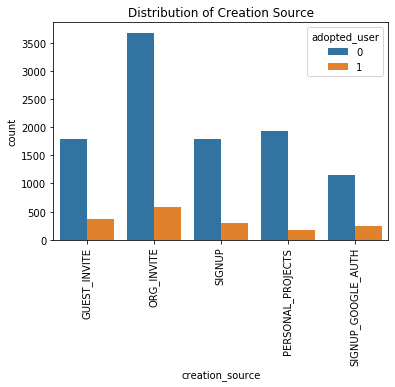

In [300]:
# plot bar chart of creation source.
_ = sns.countplot(x='creation_source', data=df, hue='adopted_user')
_ = plt.xticks(rotation=90)
_ = plt.title('Distribution of Creation Source')

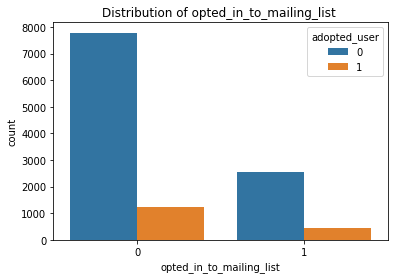

In [301]:
_ = sns.countplot(x='opted_in_to_mailing_list', data=df, hue='adopted_user')
_ = plt.title('Distribution of opted_in_to_mailing_list ')

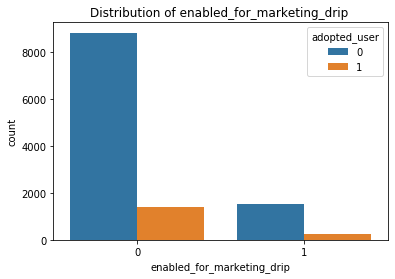

In [302]:
_ = sns.countplot(x='enabled_for_marketing_drip', data=df, hue='adopted_user')
_ = plt.title('Distribution of enabled_for_marketing_drip ')

In [303]:
# drop unneccessary columns.
df = df.drop(columns = ['object_id', 'creation_time','name','email', 'last_session_creation_time', 'invited_by_user_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 5 columns):
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
adopted_user                  12000 non-null int32
dtypes: int32(1), int64(3), object(1)
memory usage: 835.6+ KB


In [304]:
# create dummy variables
dummies = pd.get_dummies(df['creation_source'])
new_df = pd.concat([df, dummies], axis=1).drop('creation_source', axis=1)

# create target and predictive columns
y = new_df['adopted_user']
X = new_df.drop('adopted_user', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [305]:
# find best parameter for Random Forest model
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

params = {'n_estimators': range(1,100,20)}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameter:', model.best_params_)
print('Best average precision:', model.best_score_)

C:\Users\skisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter: {'n_estimators': 21}
Best average precision: 0.7308888888888889


In [307]:
# build the Random Forest  Model
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=21)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.7253333333333334
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      2580
           1       0.14      0.20      0.17       420

    accuracy                           0.73      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.76      0.73      0.74      3000



In [285]:
# take a look at feature importance
imp_features = pd.Series(model.feature_importances_, index=X.columns)
imp_features = imp_features.sort_values(ascending=False)
print(imp_features)

org_id                        0.941668
PERSONAL_PROJECTS             0.016290
enabled_for_marketing_drip    0.011659
opted_in_to_mailing_list      0.011627
GUEST_INVITE                  0.006036
SIGNUP_GOOGLE_AUTH            0.005343
ORG_INVITE                    0.004221
SIGNUP                        0.003157
dtype: float64


There are 1656 adopted users. When we use the Random Forest Clasiffication model, we see that org_id is the most important feature to become adopted user.